In [1]:
from nmon import *

In [2]:
N = 1
M = 1
EC_shunt = 0.18 * 1

# choose sparse: 100/100, 100/10, 100/5, 100/3
# choose dense: 100/2

nmon = Nmon(N=N, M=M, EJN=100*EC_shunt, EJM=3*EC_shunt, EC_shunt=EC_shunt)

nmon.hamiltonian_calc(flux=0.0, ng=[0.0], num_levels=3, make_plot=False, just_H=True, cutoff=31)#compute_cutoff(nmon.EJN, nmon.EJM, nmon.EC_total, cutoff_space=[2, 8]))

# nmon.H_arr = nmon.nmon_circ.hamiltonian().toarray() # sparse array

# nmon.H_arr = (np.real(nmon.H_arr))
# nmon.bound_state_energies, nmon.H_arr

# print(nmon.H_arr)

EJM_idx, EJN_idx = np.where(nmon.H_arr[0] != 0)[0][1:][0], np.where(nmon.H_arr[0] != 0)[0][1:][-1]
# np.absolute(max(np.diag(nmon.H_arr)) / nmon.H_arr.shape[0]**2 / (M*nmon.H_arr[0, EJM_idx] + N * nmon.H_arr[0, EJN_idx]) )
np.absolute(max(np.diag(nmon.H_arr)) / (nmon.H_arr.shape[0]**(1/3) - 1 )/2  / (M*nmon.H_arr[0, EJM_idx] + N * nmon.H_arr[0, EJN_idx]) ) / 1e3

np.float64(0.006083335749871978)

In [3]:
# Matr = nmon.nmon_circ.transformation_matrix
# Matr_inv = np.linalg.inv(Matr)
# Matr, Matr_inv, nmon.sym_hamiltonian

In [4]:
# nmon.H = scipy.sparse.csr_matrix(np.absolute(nmon.H))
# eval, evec = spla.eigsh(nmon.H, which='SA', k=3)
# eval

In [5]:
import numpy as np
from numba import njit

@njit
def compute_eigh(H):
    return np.linalg.eigh(H)

In [6]:
# nmon.H_arr = np.absolute(nmon.H_arr)
# eigenvalues, eigenvectors = compute_eigh(nmon.H_arr)
# eigenvalues[:3]

In [7]:
# size = nmon.H.shape[0]
# nmon.H = np.absolute(nmon.H)
# for i in range(size):
#     for j in range(size):
#         # print(round(nmon.H[i,j], 2), end=' ')
#         print(nmon.H[i,j], end=' ')
#         # pass
#     print()

In [8]:
# import numpy as np

# def transmon_hamiltonian_with_flux_and_ng(EJ, EC, n_cut, Phi, n_g):
#     """
#     Generate the Hamiltonian matrix for a transmon qubit in the charge basis,
#     including a flux-dependent Josephson term and offset charge n_g.

#     Parameters:
#     EJ (float): Josephson energy.
#     EC (float): Charging energy.
#     n_cut (int): Cut-off for the charge basis. The Hamiltonian size will be (2 * n_cut + 1) x (2 * n_cut + 1).
#     Phi (float): External flux in units of the flux quantum (Φ/Φ0).
#     n_g (float): Offset charge.

#     Returns:
#     np.ndarray: The Hamiltonian matrix.
#     """
#     # Define the size of the Hamiltonian
#     dim = 2 * n_cut + 1
#     H = np.zeros((dim, dim), dtype=complex)

#     # Populate the diagonal with charging energy terms
#     for n in range(-n_cut, n_cut + 1):
#         index = n + n_cut
#         H[index, index] = 4 * EC * (n - n_g)**2  # Including n_g

#     # Populate the off-diagonal with flux-modulated Josephson energy terms
#     for n in range(-n_cut, n_cut):
#         index = n + n_cut
#         H[index, index + 1] = -EJ / 2 * (1 + np.exp(-2j * np.pi * Phi))  # e^{i(θ - 2πΦ)}
#         H[index + 1, index] = -EJ / 2 * (1 + np.exp(2j * np.pi * Phi))   # e^{-i(θ - 2πΦ)}

#     return H.real  # Return only the real part for Hermitian matrix

# # Example usage
# n_cut = 3
# Phi = 0.0
# n_g = 0.0  # Example offset charge

# hamiltonian_matrix_flux_ng = transmon_hamiltonian_with_flux_and_ng(EJ=1.5*nmon.EJM, EC=nmon.EC_total, n_cut=n_cut, Phi=Phi, n_g=n_g)
# np.round(hamiltonian_matrix_flux_ng, 2)


In [9]:
# import numpy as np

# def extended_transmon_hamiltonian(EJ_N, EJ_M, EC, n_cut, Phi, n_g, N, M):
#     # Define the size of the Hamiltonian
#     dim = 2 * n_cut + 1
#     H = np.zeros((dim, dim), dtype=complex)

#     # Populate the diagonal with charging energy terms
#     for n in range(-n_cut, n_cut + 1):
#         index = n + n_cut
#         H[index, index] = 4 * EC * (n - n_g)**2  # Including n_g for the charge basis

#     # Populate the off-diagonal with Josephson energy terms for the N * EJ_N * cos(M * phi) term
#     for n in range(-n_cut, n_cut - M + 1):
#         index = n + n_cut
#         H[index, index + M] += -N * EJ_N / 2  # Corresponding to cos(M * phi)
#         H[index + M, index] += -N * EJ_N / 2

#     flux_term = np.exp(2j * np.pi * Phi / M)
#     # Populate the off-diagonal with Josephson energy terms for the M * EJ_M * cos(N * phi + 2*pi*Phi/M) term
#     for n in range(-n_cut, n_cut - N + 1):
#         index = n + n_cut
#         H[index, index + N] += -M * EJ_M / 2 * ( flux_term)  # Corresponding to cos(N * phi + 2*pi*Phi/M)
#         H[index + N, index] += -M * EJ_M / 2 * (np.conj(flux_term))

#     return H.real  # Return the Hermitian part

# # Example usage
# n_cut = 4  # Charge basis cutoff
# Phi = 0.0 # External flux in units of Φ/Φ0
# n_g = 0.0  # Offset charge
# N = 1      # Factor for cos(M * phi)
# M = 1      # Factor for cos(N * phi + 2*pi*Phi/M)

# hamiltonian_matrix_extended = extended_transmon_hamiltonian(nmon.EJN, nmon.EJM, nmon.EC_total, n_cut, Phi, n_g, N, M)
# print(np.round(hamiltonian_matrix_extended, 2)) 
# # Solve eigenvalue problem
# eigenvalues, eigenvectors = tf.linalg.eigh(hamiltonian_matrix_extended)
# # Convert to numpy for inspection (if needed)
# eigenvalues = eigenvalues.numpy()
# print(sorted(eigenvalues))

# max(np.diag(hamiltonian_matrix_extended)) / hamiltonian_matrix_extended.shape[0]**2 / hamiltonian_matrix_extended[0, 1]


In [10]:
# nmon.sym_hamiltonian

In [11]:
# import numpy as np
# import matplotlib.pyplot as plt
# import sympy as sp

# # Define the symbolic variables
# theta_variables = []
# n_variables = []
# ng_variables = []

# for i in range(1, nmon.N + nmon.M):
#     theta_variables.append(sp.symbols(f'θ{i}'))
#     n_variables.append(sp.symbols(f'n{i}'))
#     ng_variables.append(sp.symbols(f'n_g{i}'))

# _2pi_Phi1 = sp.symbols('(2πΦ_{1})')

# flux_list = np.linspace(0, 0.49, 5)

# for flux in flux_list:

#     # Define the Hamiltonian
#     hamiltonian = nmon.sym_hamiltonian

#     # Substitute n1, n2, n_g1, n_g2 with 0 as per user request
#     hamiltonian = hamiltonian.subs({ni: 0 for ni in n_variables})
#     hamiltonian = hamiltonian.subs({n_gi: 0 for n_gi in ng_variables})
#     hamiltonian = hamiltonian.subs({_2pi_Phi1:2*np.pi*flux})

#     print(hamiltonian.free_symbols)

#     # Check if one or two theta variables are present for plotting
#     def plot_hamiltonian(hamiltonian_expr, theta_vars):
#         if len(theta_vars) == 1:
#             theta = theta_vars[0]
#             theta_vals = np.linspace(-np.pi, np.pi, 50)
#             potential_vals = np.array([hamiltonian_expr.subs(theta, val).evalf() for val in theta_vals], dtype=float)
            
#             plt.figure(figsize=(8, 6))
#             plt.plot(theta_vals, potential_vals, label=f'Potential vs {theta}')
#             plt.xlabel(f'{theta} (radians)')
#             plt.ylabel('Potential Energy')
#             plt.title(f'1D Potential Energy Plot, Phi={flux}')


#             for eval in nmon.bound_state_energies:
#                 plt.axhline(eval)
                
#             plt.grid(True)
#             plt.legend()
#             plt.show()
#         elif len(theta_vars) == 2:
#             theta1_vals = np.linspace(-np.pi, np.pi, 10)
#             theta2_vals = np.linspace(-np.pi, np.pi, 10)
#             theta1_mesh, theta2_mesh = np.meshgrid(theta1_vals, theta2_vals)
            
#             potential_vals = np.array([[hamiltonian_expr.subs({theta_vars[0]: t1, theta_vars[1]: t2}).evalf()
#                                         for t1 in theta1_vals] for t2 in theta2_vals], dtype=float)

#             plt.figure(figsize=(10, 8))
#             plt.contourf(theta1_mesh, theta2_mesh, potential_vals, levels=50, cmap='viridis')
#             # plt.imshow(potential_vals)
#             plt.colorbar(label='Potential Energy')
#             plt.xlabel(f'{theta_vars[0]} (radians)')
#             plt.ylabel(f'{theta_vars[1]} (radians)')
#             plt.title(f'2D Potential Energy Plot, Phi={flux}')
#             plt.grid(True)
#             plt.show()

#     plot_hamiltonian(hamiltonian, theta_variables)


In [12]:
# # scipy.linalg.eigvalsh_tridiagonal(np.diag(nmon.H), np.full(nmon.H.shape[0]-1, nmon.H[0, 1]))#, select='i', select_range=(0, 2))
# nmon.H = np.real(nmon.H)

# import numpy as np
# from scipy.linalg import eigvalsh_tridiagonal, eigvalsh
# d = np.diag(nmon.H)
# e = np.full(nmon.H.shape[0]-1, nmon.H[0, 1])
# w = eigvalsh_tridiagonal(d, e)
# A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
# w2, evec = np.linalg.eig(A)  # Verify with other eigenvalue routines
# w2 = sorted(w2)
# np.allclose(w - w2, np.zeros(nmon.H.shape[0]))

In [13]:
# plt.plot(np.arange(evec[:, 10].shape[0]), np.abs(evec[:, 40]))
# plt.yscale('log')


# y = lambda x: np.exp(-np.abs(40 - x) / (100-0)*(284-0) * 3 / 10**(1/4 * 1))
# psi0 = np.array([y(i) for i in range(nmon.H.shape[0])])

# plt.plot(np.arange(psi0.shape[0]), np.abs(psi0))

In [14]:
from nmon import *

EC_shunt = 0.18

N = 1
M = 1

N_EJN = 40
N_EJM = 40
N_flux = 5

flux_list = np.linspace(0, 0.5, N_flux)
EJM_list = np.linspace(1 * EC_shunt, 20 * EC_shunt, N_EJN)
EJN_list = np.linspace(1 * EC_shunt, 20 * EC_shunt, N_EJM)

# Generate all combinations of ng values
ng_probes = [0, 0.25, 0.5, 0.75]
ng_combinations = np.array(list(combinations_with_replacement(ng_probes, N + M - 1)))

relative_anharm_list = np.full((N_EJM, N_EJN, N_flux), None)
w01_list = np.full((N_EJM, N_EJN, N_flux), None)
w12_list = np.full((N_EJM, N_EJN, N_flux), None)
w01_variation_list = np.full_like(w01_list, None)
w01_variation_list_precise = np.full_like(w01_list, None)

# To store the ng values corresponding to min and max w01
w01_ng_min = np.empty((N_EJM, N_EJN, N_flux), dtype=object)
w01_ng_max = np.empty((N_EJM, N_EJN, N_flux), dtype=object)

for i in range(N_EJM):
    for j in tqdm(range(N_EJN)):
        nmon = Nmon(N=N, M=M, EJM=EJM_list[i], EJN=EJN_list[j], EC_shunt=EC_shunt)
        for k, flux in enumerate(flux_list):

            w01_local = []
            local_ng_values = []
            local_relative_anharm = []
            local_w12 = []

            # Iterate over all ng combinations
            for ng in ng_combinations:
                try:
                    nmon.hamiltonian_calc(flux=flux, ng=ng, num_levels=6, make_plot=False, just_H=False,
                                        cutoff=31)
                except Exception:
                    continue

                # Store w01 for the current ng
                w01_local.append(nmon.transition_freqs[0])
                local_ng_values.append(tuple(ng))

                if len(nmon.transition_freqs) > 1:
                    local_w12.append( nmon.transition_freqs[1])
                    local_relative_anharm.append(nmon.relative_anharm)

            try:
                EJM_idx, EJN_idx = np.where(nmon.H_arr[0] != 0)[0][1:][0], np.where(nmon.H_arr[0] != 0)[0][1:][-1]

                # np.absolute(max(np.diag(nmon.H_arr)) / nmon.H_arr.shape[0]**2 / (M*nmon.H_arr[0, EJM_idx] + N * nmon.H_arr[0, EJN_idx]) )
                up_value = max(np.diag(nmon.H_arr)) / (nmon.H_arr.shape[0]**(1/3) - 1 )/2
                EJM_sum = M*nmon.H_arr[0, EJM_idx]
                EJN_sum = N*nmon.H_arr[0, EJN_idx] 

                # Compute relative anharmonicity
                # Calculate w01 variation and store ng values for min and max w01
                max_idx = np.argmax(w01_local)
                min_idx = np.argmin(w01_local)

                w01_list[i, j, k] = w01_local[max_idx]  # Store the minimal w01 for any ng configuration

                w12_list[i, j, k] = local_w12[max_idx]
                relative_anharm_list[i, j, k] = local_relative_anharm[max_idx]

                w01_variation_list[i, j, k] = (np.absolute( up_value / (EJM_sum)) / 2e4 + np.absolute( up_value / (EJN_sum)) / 2e4) / w01_local[max_idx]
                w01_variation_list_precise[i, j, k] = (w01_local[max_idx] - w01_local[min_idx]) / w01_local[max_idx]
                w01_ng_min[i, j, k] = local_ng_values[min_idx]
                w01_ng_max[i, j, k] = local_ng_values[max_idx]

            except Exception:
                continue

np.save("./data_arrays/N={}_M={}_EC_shunt={}_EJM_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), EJM_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_EJN_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), EJN_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_flux_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), flux_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_rel_anharm_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), relative_anharm_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w12_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w12_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_variation_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_variation_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_variation_list_precise.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_variation_list_precise)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_ng_max.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_ng_max)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_ng_min.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_ng_min)


In [15]:


EJM_list = np.load("./data_arrays/N={}_M={}_EC_shunt={}_EJM_list.npy".format(N, M, round(EC_shunt, 2)))
EJN_list = np.load("./data_arrays/N={}_M={}_EC_shunt={}_EJN_list.npy".format(N, M, round(EC_shunt, 2)))
flux_list = np.load("./data_arrays/N={}_M={}_EC_shunt={}_flux_list.npy".format(N, M, round(EC_shunt, 2)), allow_pickle=True)
relative_anharm_list_flux = np.load("./data_arrays/N={}_M={}_EC_shunt={}_rel_anharm_list.npy".format(N, M, round(EC_shunt, 2)), allow_pickle=True)
w01_list_flux = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w01_list.npy".format(N, M, round(EC_shunt, 2)), allow_pickle=True)
w12_list_flux = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w12_list.npy".format(N, M, round(EC_shunt, 2)), allow_pickle=True)
w01_variation_list_flux = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w01_variation_list.npy".format(N, M, round(EC_shunt, 2)), allow_pickle=True)
w01_variation_list_precise = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w01_variation_list_precise.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), allow_pickle=True)
w01_ng_max_pickle = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w01_ng_max.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), allow_pickle=True)
w01_ng_min_pickle = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w01_ng_min.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), allow_pickle=True)


In [16]:
flux_list = np.array(flux_list, dtype=float)
relative_anharm_list_flux = np.array(relative_anharm_list_flux, dtype=float)
w01_list_flux = np.array(w01_list_flux, dtype=float)
w12_list_flux = np.array(w12_list_flux, dtype=float)
w01_variation_list_flux = np.array(w01_variation_list_flux, dtype=float)
w01_variation_list_precise = np.array(w01_variation_list_precise, dtype=float)

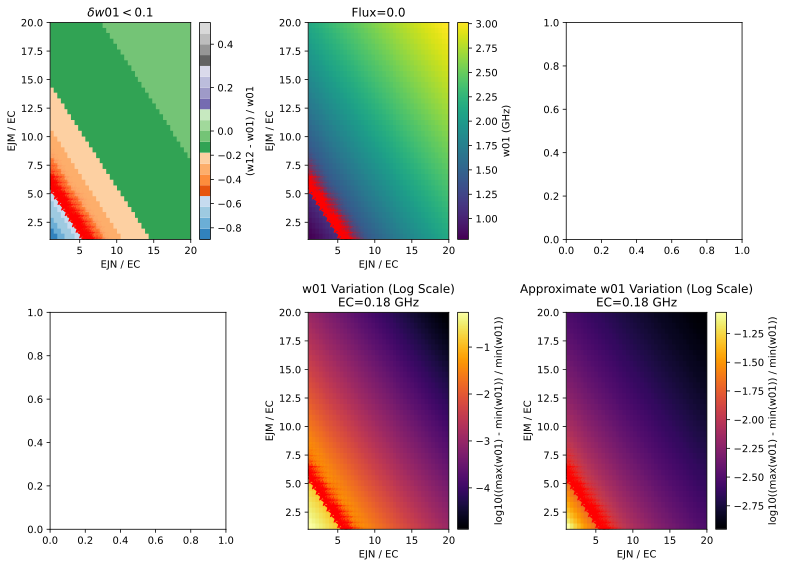

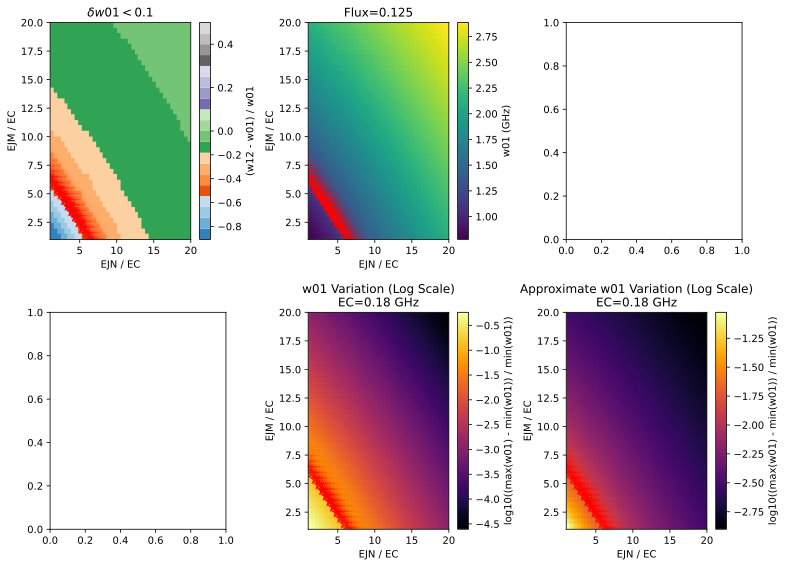

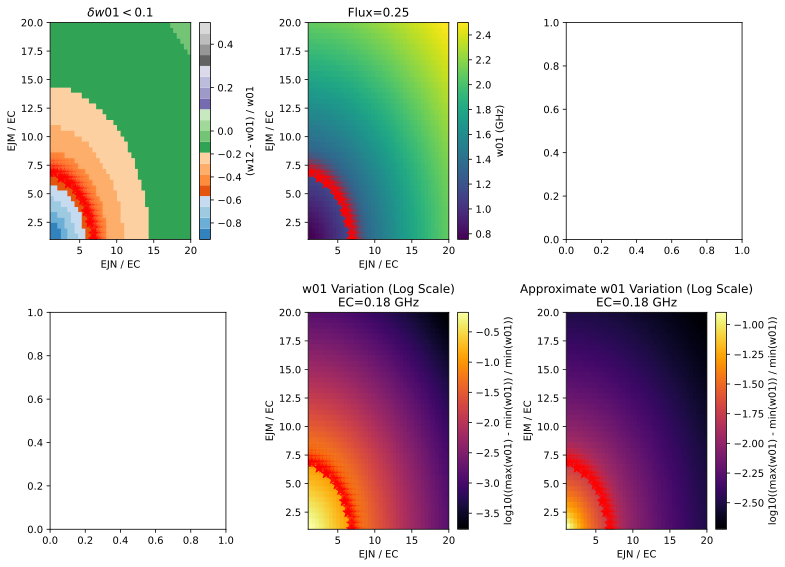

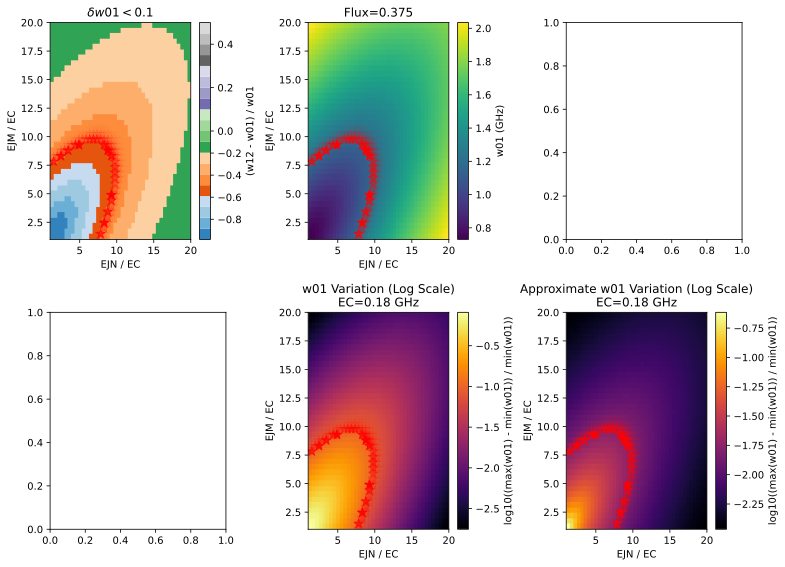

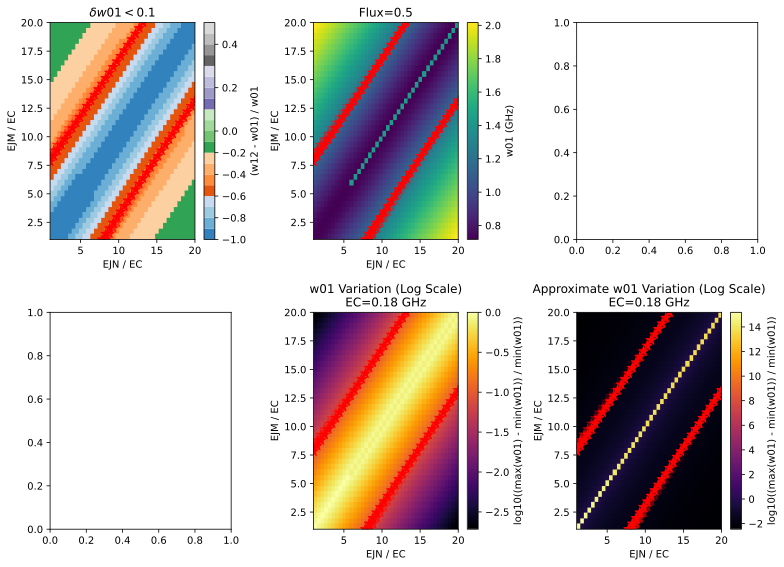

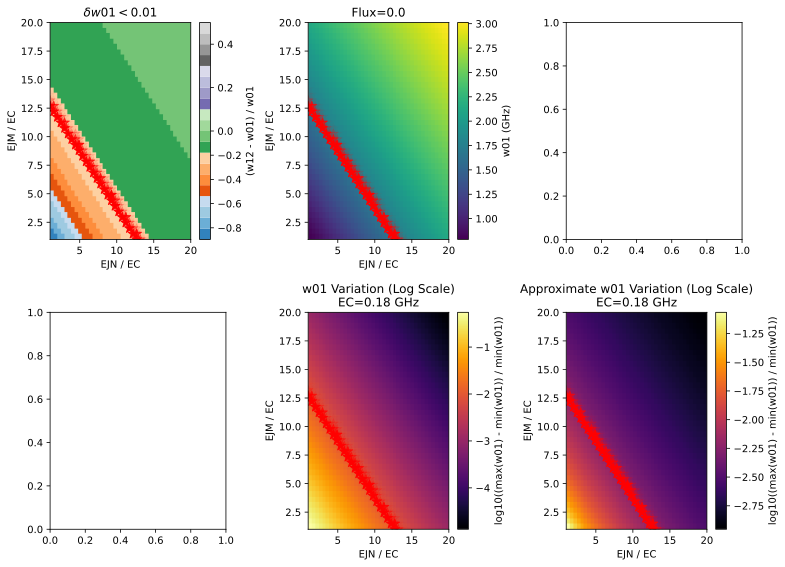

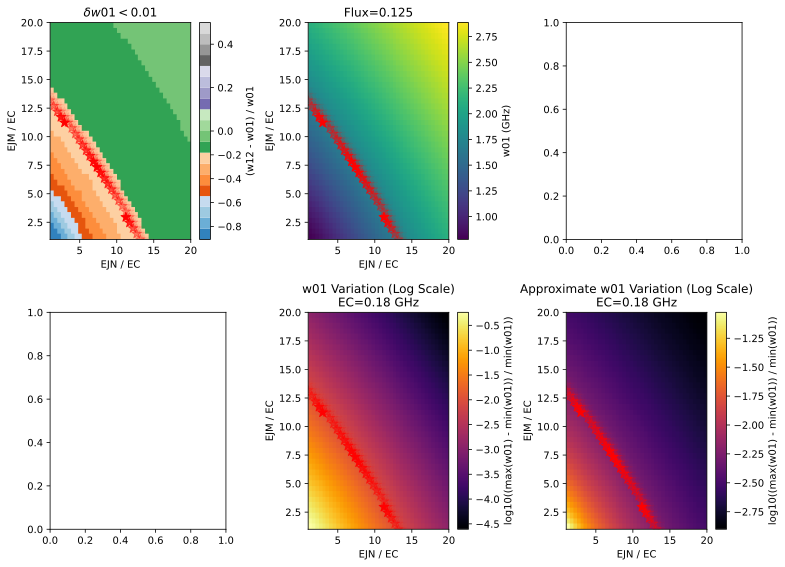

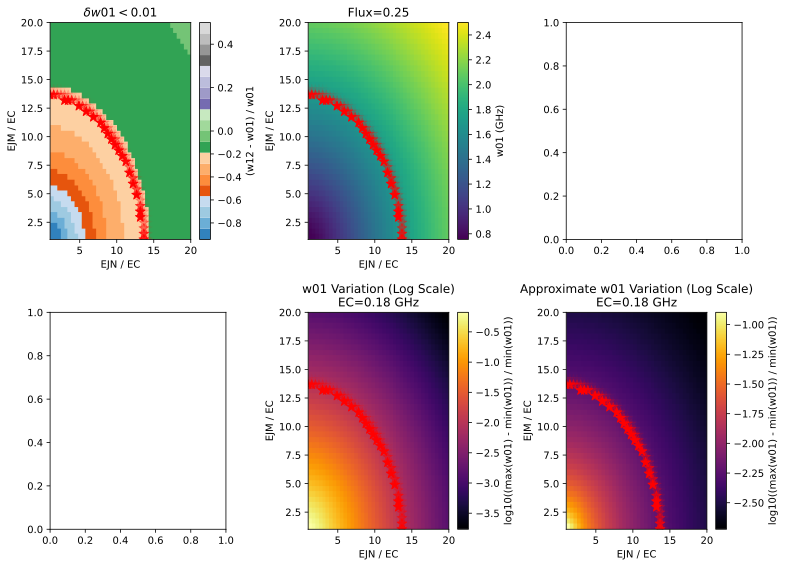

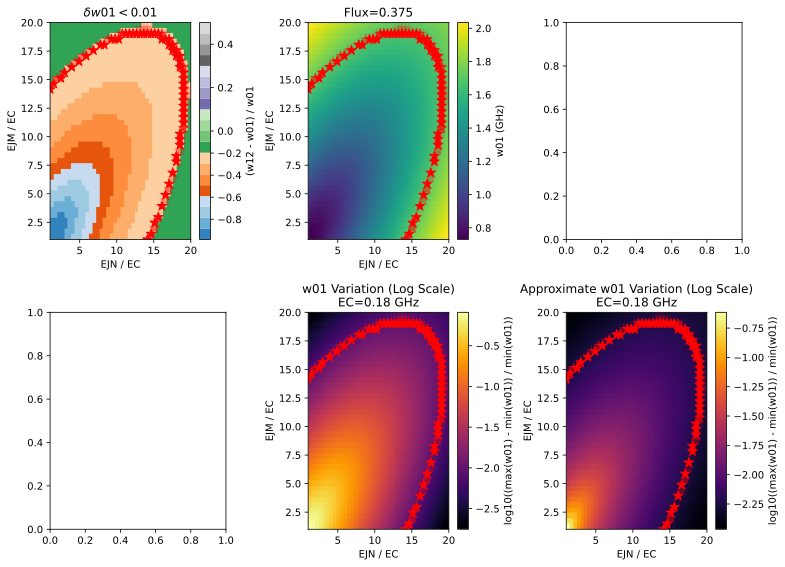

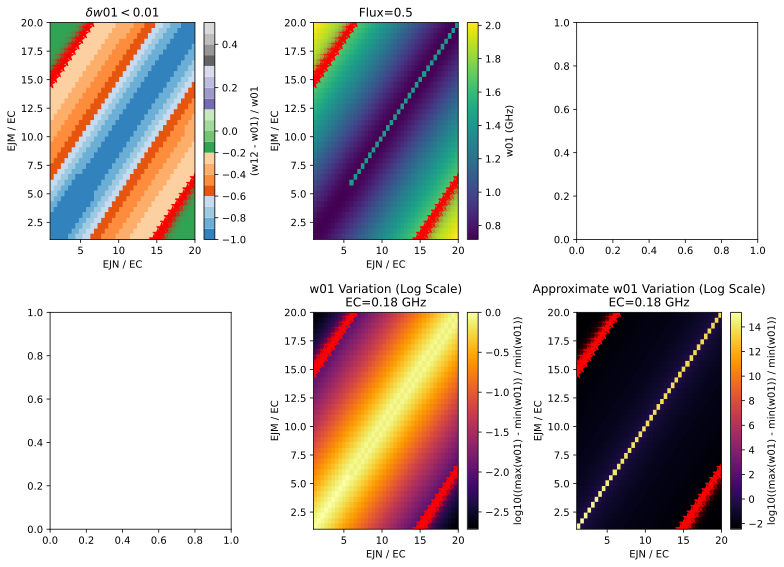

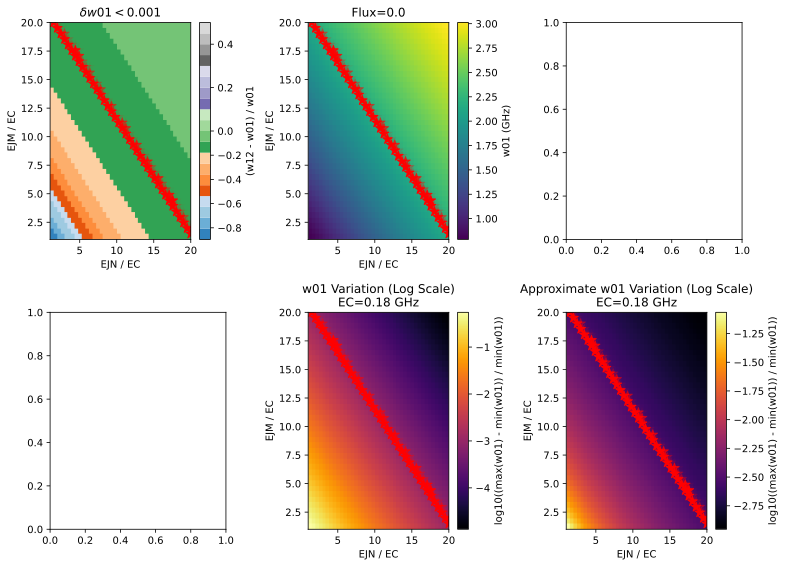

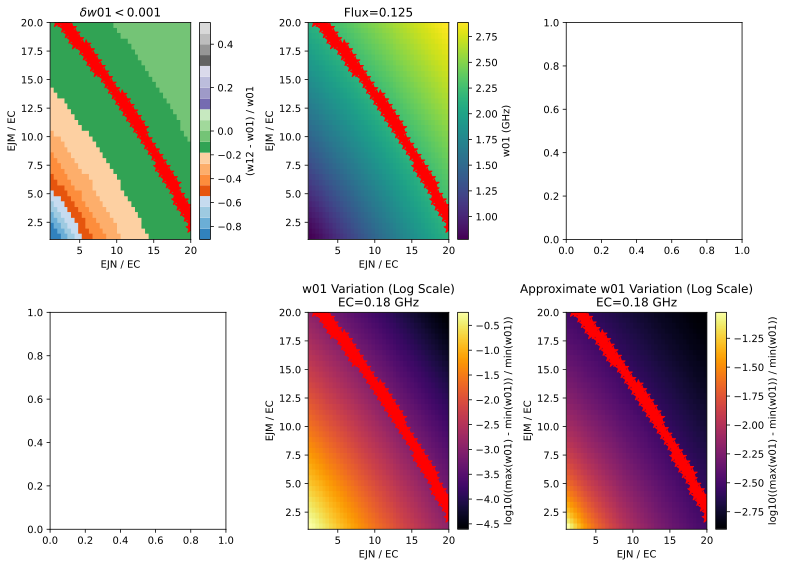

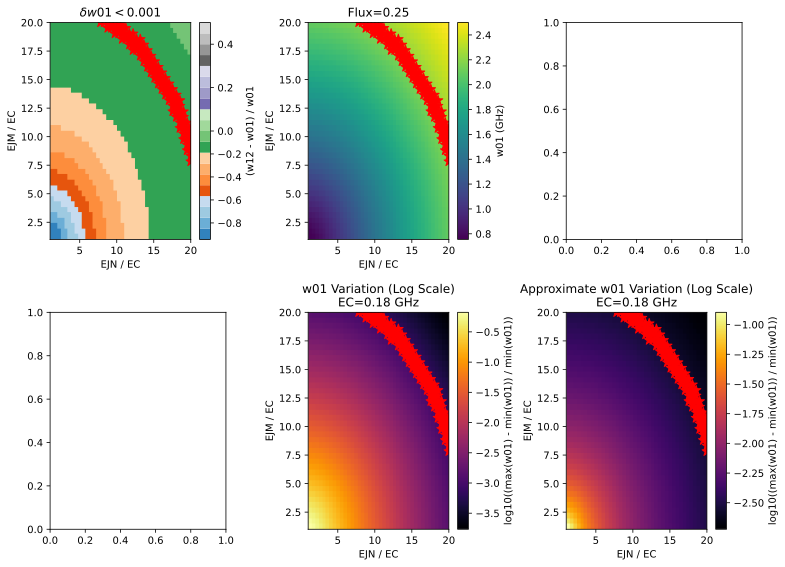

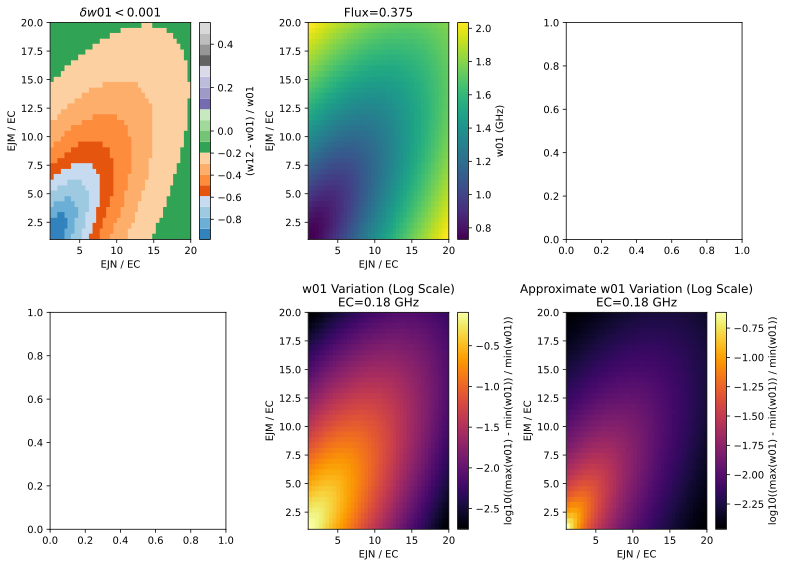

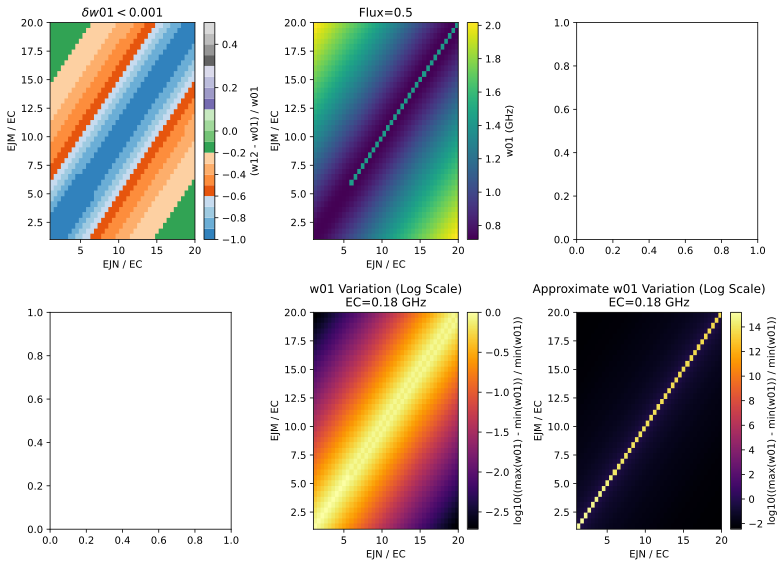

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

w01_variation_levels = [1e-1, 1e-2, 10**(-3)]

for w01_variation_lev in w01_variation_levels:

    for k, flux_value in enumerate(flux_list[:]):

        # k = flux_list.shape[0] - 1

        EJN_grid, EJM_grid = np.meshgrid(EJN_list, EJM_list)

        # Extract arrays for the current flux value
        relative_anharm_list = relative_anharm_list_flux[:, :, k]
        w01_list = w01_list_flux[:, :, k]
        w12_list = w12_list_flux[:, :, k]
        w01_variation_list = w01_variation_list_precise[:, :, k]

        # Replace NaN values in relative_anharm_list
        relative_anharm_list[np.isnan(relative_anharm_list)] = 1

        # Create DataFrame for all data points
        data = {
            'EJN': EJN_grid.flatten(),
            'EJM': EJM_grid.flatten(),
            'RelativeAnharmonicity': relative_anharm_list.flatten(),
            'w01': w01_list.flatten(),
            'w01Variation': w01_variation_list.flatten()
        }
        df = pd.DataFrame(data)

        # Filter rows where w01Variation < 10^(-1)
        filtered_df = df[df['w01Variation'] < w01_variation_lev]

        # Identify the top N_anharm points (lowest anharmonicity values)
        N_anharm = 100
        best_points = filtered_df.nsmallest(N_anharm, 'RelativeAnharmonicity')

        # Adjust alpha values for star-points
        best_anharm_values = best_points['RelativeAnharmonicity'].values
        
        N_anharm = best_anharm_values.shape[0]

        alphas = np.ones(N_anharm)
        for i in range(1, N_anharm):
            if abs(best_anharm_values[i] - best_anharm_values[i - 1]) > 1e-3:
                alphas[i:] = np.logspace(0, -2, N_anharm - i)
                break

        # Plot with imshow and overlay star-points
        fig, axes = plt.subplots(2, 3, figsize=(11, 8))

        # First subplot: Relative Anharmonicity
        norm = colors.TwoSlopeNorm(vmin=df['RelativeAnharmonicity'].min(), vcenter=0, vmax=0.5)
        im1 = axes[0, 0].imshow(relative_anharm_list, extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                            EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                                origin='lower', cmap='tab20c', norm=norm, aspect='auto')
        fig.colorbar(im1, ax=axes[0, 0], label='(w12 - w01) / w01')
        axes[0, 0].set_title(r"$\delta w01 < {}$".format(round(w01_variation_lev, 3)))
        axes[0, 0].set_xlabel('EJN / EC')
        axes[0, 0].set_ylabel('EJM / EC')

        if not best_points.empty:
        # Overlay star-points
            axes[0, 0].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                        s=100, c='red', marker='*', alpha=alphas)

        # Second subplot: w01
        im2 = axes[0, 1].imshow(w01_list, extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                                origin='lower', cmap='viridis', aspect='auto')
        fig.colorbar(im2, ax=axes[0, 1], label='w01 (GHz)')
        axes[0, 1].set_title(f"Flux={flux_value}")
        axes[0, 1].set_xlabel('EJN / EC')
        axes[0, 1].set_ylabel('EJM / EC')

        if not best_points.empty:
        # Overlay star-points
            axes[0, 1].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                        s=100, c='red', marker='*', alpha=alphas)
            
        
        # Second subplot: w01
        im2 = axes[0, 2].imshow(w12_list, extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                                origin='lower', cmap='viridis', aspect='auto')
        fig.colorbar(im2, ax=axes[0, 2], label='w12 (GHz)')
        axes[0, 2].set_title(f"Flux={flux_value}")
        axes[0, 2].set_xlabel('EJN / EC')
        axes[0, 2].set_ylabel('EJM / EC')

        if not best_points.empty:
        # Overlay star-points
            axes[0, 2].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                        s=100, c='red', marker='*', alpha=alphas)


        # Third subplot: Log10 of w01 Variation
        im3 = axes[1, 1].imshow(np.log10(w01_variation_list), extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                                    EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                                origin='lower', cmap='inferno', aspect='auto')
        fig.colorbar(im3, ax=axes[1, 1], label='log10((max(w01) - min(w01)) / min(w01))')
        axes[1, 1].set_title(f"w01 Variation (Log Scale)\nEC={round(EC_shunt, 2)} GHz")
        axes[1, 1].set_xlabel('EJN / EC')
        axes[1, 1].set_ylabel('EJM / EC')

        if not best_points.empty:
        # Overlay star-points
            axes[1, 1].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                        s=100, c='red', marker='*', alpha=alphas)
        

        im3 = axes[1, 2].imshow(np.log10(w01_variation_list_flux[:, :, k]), extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                                    EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                                origin='lower', cmap='inferno', aspect='auto')
        fig.colorbar(im3, ax=axes[1,2], label='log10((max(w01) - min(w01)) / min(w01))')
        axes[1][2].set_title(f"Approximate w01 Variation (Log Scale)\nEC={round(EC_shunt, 2)} GHz")
        axes[1][2].set_xlabel('EJN / EC')
        axes[1][2].set_ylabel('EJM / EC')

        if not best_points.empty:
        # Overlay star-points
            axes[1][2].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                        s=100, c='red', marker='*', alpha=alphas)
        

        # axes[1][2].plot(x, x,'--', color = 'white', lw=2)

        # Adjust layout and save the figure
        plt.tight_layout()
        plt.savefig(f"./data_figures/N={N}_M={M}_EC={round(EC_shunt, 2)}_flux_{k}_combined_plots.pdf")
        plt.show()


In [19]:
axes.shape

(2, 3)